In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sidd=pd.read_csv("StudentsPerformance_m.csv")

In [ ]:
sidd

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [ ]:
sidd.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  4
writing score                  2
dtype: int64

In [ ]:
sidd.dropna(inplace=True)

In [ ]:
sidd.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
sidd.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [ ]:
sidd[sidd["math score"]=="?"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [ ]:
sidd["math score"]==pd.to_numeric(sidd["math score"])

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: math score, Length: 992, dtype: bool

In [ ]:
sidd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       992 non-null    object 
 1   race/ethnicity               992 non-null    object 
 2   parental level of education  992 non-null    object 
 3   lunch                        992 non-null    object 
 4   test preparation course      992 non-null    object 
 5   math score                   992 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [ ]:
sidd["math score"]==pd.to_numeric(sidd["reading score"])

0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 992, dtype: bool

In [ ]:
sidd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       992 non-null    object 
 1   race/ethnicity               992 non-null    object 
 2   parental level of education  992 non-null    object 
 3   lunch                        992 non-null    object 
 4   test preparation course      992 non-null    object 
 5   math score                   992 non-null    float64
 6   reading score                992 non-null    float64
 7   writing score                992 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.8+ KB


In [ ]:
def detect_outliers (sidd,feature):
    q1=sidd [feature].quantile(0.25)
    q3=sidd [feature].quantile(0.75)
    iqr=q3-q1
    lowerlimit=q1-0.5*iqr
    upperlimit=q3+0.5*iqr
    return mansi[(mansi[feature]<lowerlimit) |(mansi[feature]>upperlimit)]

In [ ]:
detect_outliers(sidd,"math score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
9,female,group B,high school,free/reduced,none,38.0,60.0,50.0
11,male,group D,associate's degree,standard,none,40.0,52.0,43.0
...,...,...,...,...,...,...,...,...
970,female,group D,bachelor's degree,standard,none,89.0,100.0,100.0
979,female,group C,associate's degree,standard,none,91.0,95.0,94.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0
988,female,group A,some high school,free/reduced,none,44.0,45.0,45.0


In [ ]:
detect_outliers(sidd,"reading score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
17,female,group B,some high school,free/reduced,none,18.0,32.0,28.0
...,...,...,...,...,...,...,...,...
978,male,group D,high school,standard,completed,55.0,41.0,48.0
979,female,group C,associate's degree,standard,none,91.0,95.0,94.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0
988,female,group A,some high school,free/reduced,none,44.0,45.0,45.0


In [ ]:
detect_outliers(sidd,"writing score")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
6,female,group B,some college,standard,completed,88.0,95.0,92.0
7,male,group B,some college,free/reduced,none,40.0,43.0,39.0
11,male,group D,associate's degree,standard,none,40.0,52.0,43.0
...,...,...,...,...,...,...,...,...
979,female,group C,associate's degree,standard,none,91.0,95.0,94.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0
983,female,group A,some college,standard,completed,78.0,87.0,91.0
988,female,group A,some high school,free/reduced,none,44.0,45.0,45.0


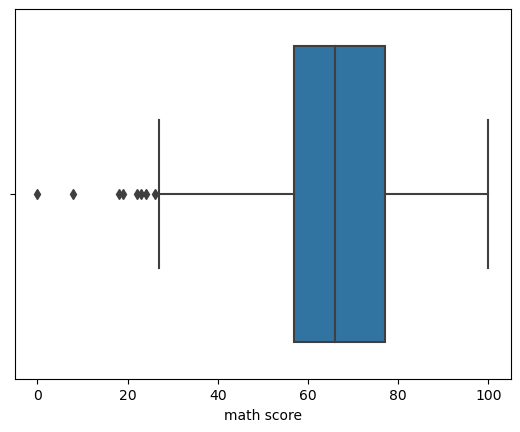

In [ ]:
#boxplot
sns.boxplot(x="math score",data=sidd)
plt.show()

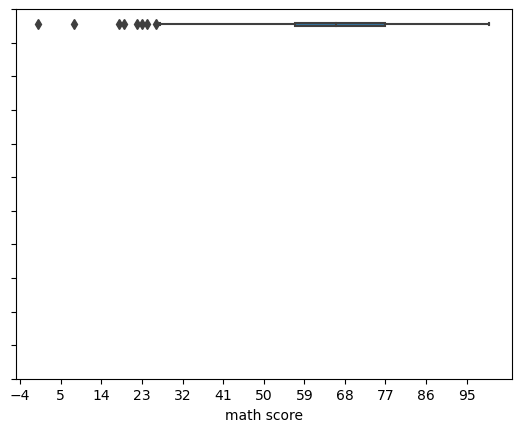

In [ ]:
bins=np.arange(-4,100,9)
sns.boxplot(x="math score", data=sidd)
plt.xticks(bins)
plt.yticks(bins)
plt.show()

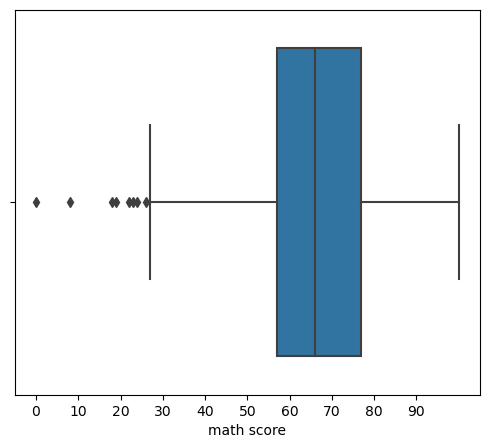

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x="math score",data=sidd)
plt.xticks(np.arange(0,100,10))
plt.show()

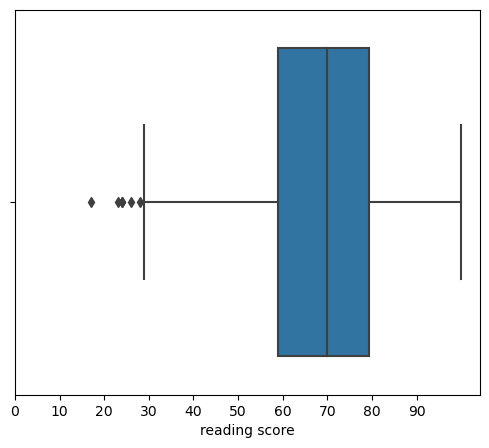

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x="reading score",data=sidd)
plt.xticks(np.arange(0,100,10))
plt.show()

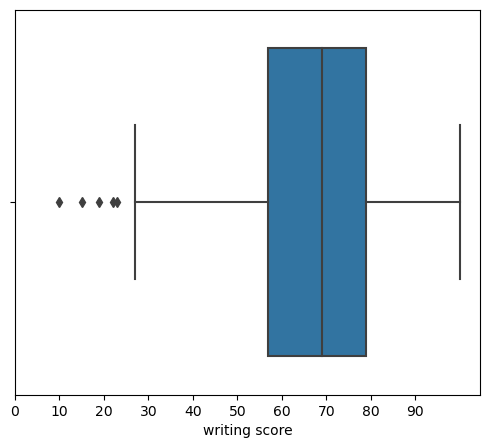

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x="writing score",data=sidd)
plt.xticks(np.arange(0,100,10))
plt.show()

In [ ]:
#minmaxscaler
#Standardscaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
sidd["reading score"]=scaler.fit_transform(sidd[["reading score"]])

In [ ]:
sidd

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,0.662651,74.0
1,female,group C,some college,standard,completed,69.0,0.879518,88.0
2,female,group B,master's degree,standard,none,90.0,0.939759,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,0.481928,44.0
4,male,group C,some college,standard,none,76.0,0.734940,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,0.987952,95.0
996,male,group C,high school,free/reduced,none,62.0,0.457831,55.0
997,female,group C,high school,free/reduced,completed,59.0,0.650602,65.0
998,female,group D,some college,standard,completed,68.0,0.734940,77.0


In [ ]:
sidd["math score"]=scaler.fit_transform(mansi[["math score"]])

In [ ]:
sidd

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,74.0
1,female,group C,some college,standard,completed,0.69,0.879518,88.0
2,female,group B,master's degree,standard,none,0.90,0.939759,93.0
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,44.0
4,male,group C,some college,standard,none,0.76,0.734940,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.987952,95.0
996,male,group C,high school,free/reduced,none,0.62,0.457831,55.0
997,female,group C,high school,free/reduced,completed,0.59,0.650602,65.0
998,female,group D,some college,standard,completed,0.68,0.734940,77.0


In [ ]:
sidd["writing score"]=scaler.fit_transform(sidd[["math score"]])

In [ ]:
sidd

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.72
1,female,group C,some college,standard,completed,0.69,0.879518,0.69
2,female,group B,master's degree,standard,none,0.90,0.939759,0.90
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.47
4,male,group C,some college,standard,none,0.76,0.734940,0.76
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.987952,0.88
996,male,group C,high school,free/reduced,none,0.62,0.457831,0.62
997,female,group C,high school,free/reduced,completed,0.59,0.650602,0.59
998,female,group D,some college,standard,completed,0.68,0.734940,0.68


In [ ]:
#z score
def trim(col:pd.core.series.Series):
    lowerlimit=col.mean()-3*col.std()
    upperlimit=col.mean()+3*col.std()
    new_col=col[(col<upperlimit) & (col>lowerlimit)]
    return new_col

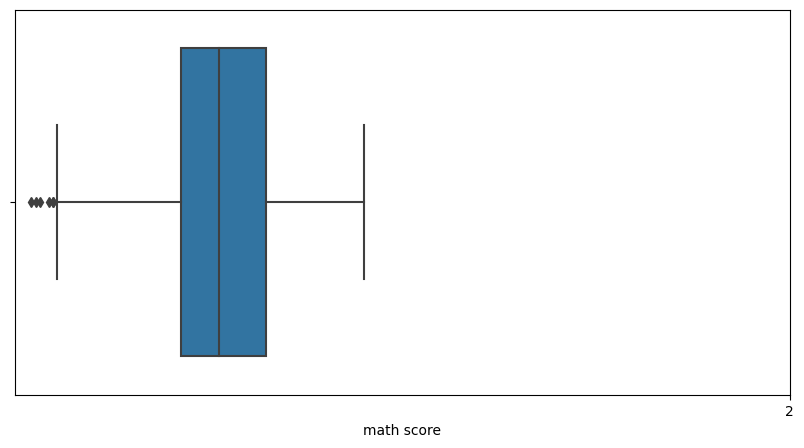

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=trim(sidd["math score"]), data=sidd)
plt.xticks(np.arange(2,5,5))
plt.show()

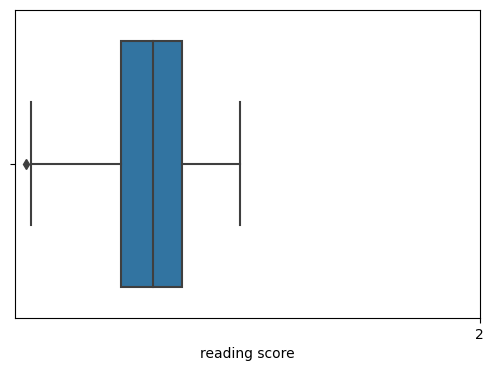

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=trim(sidd["reading score"]), data=sidd)
plt.xticks(np.arange(2,5,5))
plt.show()

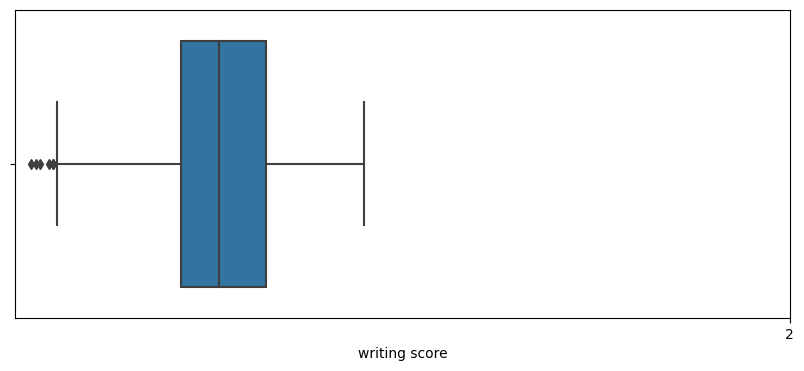

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=trim(sidd["writing score"]), data=sidd)
plt.xticks(np.arange(2,5,5))
plt.show()